# THERE ARE 6 Cases OVERALL for Market Strategy Treatment group Analysis:

### CASE 1)	Cancel --> Marketing Strategy (MS) (CALL/Email) --> Appointment --------> POSITIVE RESULT
### CASE 2)	Appointment --> MS --> Cancel ------------------------------------------> NEGATIVE RESULT

### CASE 3)	Strategy --> Appointment --> Cancel ------------------------------------> POSITIVE, 
    ### BUT, CHANGED DECISION, may be unsatisfied with the service

### CASE 4)	Strategy --> Cancel --> Appointment ------------------------------------> Negative, 
    ### BUT, AGAIN TOOK THE APPOINTMENT may be an upcoming outlier like birthday party, anniversary party, etc



### CASE 5)	Cancel --> Appointment --> Strategy ------------------------------------> Positive (No Inference)
### CASE 6)	Appointment --> Cancel --> Strategy ------------------------------------> NEGATIVE (No Inference)



### 1,2,3,4 will be analysed to understand the efficacy of reactivation initiatives in Q1.


# AND 2 Cases FOR CONTROL GROUP Analysis:

### Case 1)	Appointment --> Cancel
### Case 2)	Cancel --> Appointment


In [141]:
import pandas as pd
import sqlite3
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [142]:
# Load the CSV data into a DataFrame
df_appointments = pd.read_csv(r"C:\Users\Hp\Desktop\appointments.csv")

In [143]:
df_appointments.head()

,customer_id,appointment_timestamp
0,1,2022-12-18
1,2,2022-12-04
2,2,2022-12-16
3,2,2022-12-31
4,3,2022-12-30


In [144]:
df_appointments.dtypes

customer_id               int64
appointment_timestamp    object
dtype: object

In [145]:
df_appointments.shape

(11902, 2)

In [146]:
df_appointments.nunique()

customer_id              5000
appointment_timestamp      62
dtype: int64

### Inference: 5000 customers have 11902 appointments on 62 unique days, so on an average 192 appointments per day. Thus Helping Group should be prepared for these kind of demands with the proportionate worker supply. 

In [147]:
df_cancellations = pd.read_csv(r"C:\Users\Hp\Desktop\cancellations.csv")

In [148]:
df_cancellations.head()

,customer_id,cancellation_timestamp
0,1,2023-01-11
1,2,2023-01-02
2,3,2023-01-20
3,4,2023-01-21
4,5,2023-01-07


In [149]:
df_cancellations.dtypes

customer_id                int64
cancellation_timestamp    object
dtype: object

In [150]:
df_cancellations.shape

(5000, 2)

In [151]:
df_cancellations.nunique()

customer_id               5000
cancellation_timestamp      31
dtype: int64

### 5000 Cancellations in 31 unique days. On an avearge 161 cancellations per day !!!

In [152]:
df_emails = pd.read_csv(r"C:\Users\Hp\Desktop\emails.csv")

In [153]:
df_emails.head()

,customer_id,email_timestamp,email_type
0,5,2023-01-09,reactivation
1,5,2023-01-19,reactivation
2,5,2023-01-27,update
3,5,2023-01-18,promo
4,16,2023-01-22,reactivation


In [154]:
df_emails.dtypes

customer_id         int64
email_timestamp    object
email_type         object
dtype: object

In [155]:
df_emails.shape

(4193, 3)

In [156]:
df_emails.nunique()

customer_id        1694
email_timestamp      60
email_type            4
dtype: int64

In [157]:
df_emails['email_type'].value_counts()

email_type
reactivation    2308
update           643
promo            627
newsletter       615
Name: count, dtype: int64

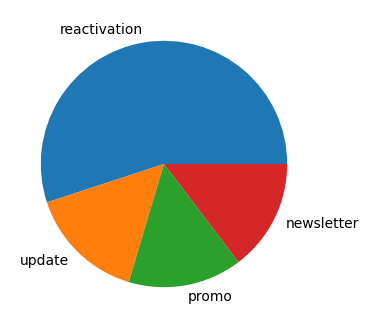

In [158]:
df_emails['email_type'].value_counts().plot(kind='pie', figsize=(4, 4), labels=df_emails['email_type'].value_counts().index)
plt.ylabel('')  # To remove the default label 'email_type'
plt.show()

In [159]:
df_calls = pd.read_csv(r"C:\Users\Hp\Desktop\calls.csv")

In [160]:
df_calls.head()

,customer_id,call_timestamp,call_answered
0,1,2023-01-22,True
1,4,2023-02-09,True
2,9,2023-02-20,False
3,11,2023-02-01,True
4,12,2023-02-05,True


In [161]:
df_calls.shape

(1684, 3)

In [162]:
df_calls.nunique()

customer_id       1684
call_timestamp      60
call_answered        2
dtype: int64

### No duplicates here unlike emails. A single customer was called once but mailed multiple times.

In [163]:
df_calls["call_answered"].value_counts()

call_answered
True     885
False    799
Name: count, dtype: int64

<Axes: xlabel='call_answered'>

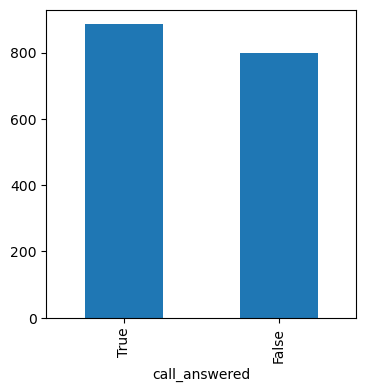

In [164]:
df_calls["call_answered"].value_counts().plot(kind = 'bar', figsize = (4,4))

### Class is balanced more or less. Statistical theorems like normality, binomiality, law or large numbers can be applied. 

### Moreover, more people replied than no replies, but what is intriguing is that almost half the people didn't reply a call. Usually people reply on calls. 

### Maybe our numbers have been marked as spam. 

### Maybe the timing of the call was not appropriate, what was the occupational , geographic , etc distribution of our customers ? Working hours / Students ?? 

### This could help in getting better insights on when to call as well as devising customized business startegies for different customer segments. !!! Hint to Question 4

### Checking for null values

In [165]:
df_calls.isnull().sum()

customer_id       0
call_timestamp    0
call_answered     0
dtype: int64

In [166]:
df_emails.isnull().sum()

customer_id        0
email_timestamp    0
email_type         0
dtype: int64

In [167]:
df_appointments.isnull().sum()

customer_id              0
appointment_timestamp    0
dtype: int64

In [168]:
df_cancellations.isnull().sum()

customer_id               0
cancellation_timestamp    0
dtype: int64

# Data is Clean, no missing values are there, classes are balanced, standardized format is there. So now we can transition from wrangling to analysis

# However, we must make a control group table with cutomer_ids and timestamps who were not exposed to any market initiative. This will acts as a benchmark for our comparative analysis.

In [169]:
# Merge calls and emails dataframes to identify customer IDs and timestamps present in both
merged_calls_emails = pd.concat([df_calls[['customer_id', 'call_timestamp']], df_emails[['customer_id', 'email_timestamp']]])

In [170]:
# Identify customer IDs and timestamps in cancellations dataframe but not in merged_calls_emails
control_group = pd.merge(df_cancellations, merged_calls_emails, on=['customer_id'], how='left', indicator=True)
control_group = control_group[control_group['_merge'] == 'left_only']

In [171]:
control_group.head()

,customer_id,cancellation_timestamp,call_timestamp,email_timestamp,_merge
1,2,2023-01-02,NaN,NaN,left_only
2,3,2023-01-20,NaN,NaN,left_only
8,6,2023-01-19,NaN,NaN,left_only
9,7,2023-01-17,NaN,NaN,left_only
10,8,2023-01-08,NaN,NaN,left_only


In [172]:
# Drop the indicator column
control_group.drop('_merge', axis=1, inplace=True)

In [173]:
control_group.head()

,customer_id,cancellation_timestamp,call_timestamp,email_timestamp
1,2,2023-01-02,NaN,NaN
2,3,2023-01-20,NaN,NaN
8,6,2023-01-19,NaN,NaN
9,7,2023-01-17,NaN,NaN
10,8,2023-01-08,NaN,NaN


In [174]:
control_group.drop('call_timestamp', axis=1, inplace=True)
control_group.drop('email_timestamp', axis=1, inplace=True)

In [175]:
control_group.head()

,customer_id,cancellation_timestamp
1,2,2023-01-02
2,3,2023-01-20
8,6,2023-01-19
9,7,2023-01-17
10,8,2023-01-08


In [176]:
control_group.reset_index(drop=True, inplace=True)

In [177]:
control_group.head()

,customer_id,cancellation_timestamp
0,2,2023-01-02
1,3,2023-01-20
2,6,2023-01-19
3,7,2023-01-17
4,8,2023-01-08


In [178]:
control_group.shape

(1622, 2)

### Thus, 1622 people were unexposed to our marketing initiative and will act as a reference group. Now we shall begin our analysis and start answering Q1.

# Q1: How well do the different reactivation initiatives work? Please answer this question using pure SQL

# CASE 1a: Cancellation --> Call --> Appointment --> Positive (For call)

# Making basic SQL tables: appointments, calls, emails, cancellations, control_group

In [179]:
conn = sqlite3.connect(':memory:')

In [180]:
# Convert the DataFrame into a SQL table
df_appointments.to_sql('appointments', conn, if_exists='replace', index=False)
df_calls.to_sql('calls', conn, if_exists='replace', index=False)
df_emails.to_sql('emails', conn, if_exists = 'replace', index=False)
df_cancellations.to_sql('cancellations', conn, if_exists='replace', index=False)
control_group.to_sql('control_group', conn, if_exists='replace', index=False)

1622

In [181]:

query1 = """
SELECT a.customer_id,cc.cancellation_timestamp, c.call_timestamp, a.appointment_timestamp, c.call_answered
FROM appointments a
JOIN calls c ON a.customer_id = c.customer_id
JOIN cancellations cc ON a.customer_id = cc.customer_id
WHERE a.appointment_timestamp > cc.cancellation_timestamp
  AND a.appointment_timestamp > c.call_timestamp
  AND cc.cancellation_timestamp < c.call_timestamp;
"""

In [182]:
# Execute the SQL query and fetch the results into a new DataFrame
result_df = pd.read_sql_query(query1, conn)

In [183]:
# Display the result
print(result_df)

     customer_id cancellation_timestamp call_timestamp appointment_timestamp  \
0             11             2023-01-25     2023-02-01            2023-02-17   
1             15             2023-01-03     2023-01-06            2023-02-07   
2             22             2023-01-03     2023-01-18            2023-02-05   
3             23             2023-01-17     2023-01-28            2023-02-15   
4             25             2023-01-07     2023-01-21            2023-02-26   
5             29             2023-01-20     2023-02-12            2023-02-13   
6             30             2023-01-17     2023-01-22            2023-02-25   
7             34             2023-01-22     2023-02-15            2023-03-01   
8             60             2023-01-15     2023-02-14            2023-02-27   
9             62             2023-01-06     2023-01-20            2023-02-27   
10            65             2023-01-29     2023-02-15            2023-02-28   
11            67             2023-01-24 

In [184]:
result_df.shape

(795, 5)

In [185]:
result_df.head()

,customer_id,cancellation_timestamp,call_timestamp,appointment_timestamp,call_answered
0,11,2023-01-25,2023-02-01,2023-02-17,1
1,15,2023-01-03,2023-01-06,2023-02-07,1
2,22,2023-01-03,2023-01-18,2023-02-05,0
3,23,2023-01-17,2023-01-28,2023-02-15,0
4,25,2023-01-07,2023-01-21,2023-02-26,1


In [186]:
result_df['call_answered'].value_counts()

call_answered
1    412
0    383
Name: count, dtype: int64

### Total calls made: 1684 --> 885 picked , 799 didn't pick 

### 795 Converted, But only 412 picked and converted and 383 didn't pick and still converted

## Conversion ratio = (Picked and converted )/ Total calls made = 412/1684 = 24.46%

### However, it is also important to notice that out of the converted ones more are those who picked our calls (29), but this number is not substantial. 

### More more detailed insights we can also compare it to the control group, but first let us analyse for emails, then we will do a comparative analysis between control and treatment groups

#  CASE 1b: Cancellation --> Email --> Appointment --> Positive (For Email)

In [187]:
query_2 = """ 
SELECT a.customer_id, cc.cancellation_timestamp, e.email_timestamp, a.appointment_timestamp, e.email_type
FROM appointments a
JOIN emails e ON a.customer_id = e.customer_id
JOIN cancellations cc ON a.customer_id = cc.customer_id
WHERE a.appointment_timestamp > cc.cancellation_timestamp
AND a.appointment_timestamp > e.email_timestamp
AND cc.cancellation_timestamp < e.email_timestamp;
"""

In [188]:
# Execute the SQL query and fetch the results into a new DataFrame
result_df_2 = pd.read_sql_query(query_2, conn)

In [189]:
result_df_2.head()

,customer_id,cancellation_timestamp,email_timestamp,appointment_timestamp,email_type
0,16,2023-01-18,2023-01-19,2023-02-02,promo
1,16,2023-01-18,2023-01-22,2023-02-02,reactivation
2,33,2023-01-30,2023-02-03,2023-02-24,update
3,33,2023-01-30,2023-02-13,2023-02-24,reactivation
4,35,2023-01-12,2023-01-17,2023-02-06,reactivation


In [190]:
result_df_2.shape

(1362, 5)

In [191]:
result_df_2.nunique()

customer_id               608
cancellation_timestamp     31
email_timestamp            55
appointment_timestamp      31
email_type                  4
dtype: int64

### Multiple emails have been sent to the same customer at different timestamps and are of differnt types

### A total of 4193 emails were sent to 1694 customers. Out of these 608 customers got converted. 


In [192]:
result_df_2['email_type'].value_counts()

email_type
reactivation    747
promo           214
update          209
newsletter      192
Name: count, dtype: int64

<Axes: ylabel='count'>

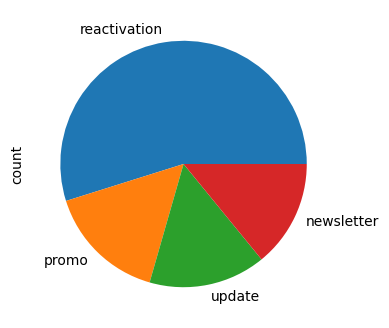

In [193]:
result_df_2['email_type'].value_counts().plot(kind = 'pie', figsize = (4,4))


## Conversion ratio = Conversions/ Customers approached = 608/1694 = 35.89% , around 11% higher than calls. However, More cases are left and must be analysed before making an inference.

# CASE 2a)	Appointment --> Call --> Cancel --------------- >NEGATIVE

In [194]:
query_3 = """
SELECT a.customer_id,cc.cancellation_timestamp, c.call_timestamp, a.appointment_timestamp, c.call_answered
FROM appointments a
JOIN calls c ON a.customer_id = c.customer_id
JOIN cancellations cc ON a.customer_id = cc.customer_id
WHERE a.appointment_timestamp < c.call_timestamp
  AND c.call_timestamp < cc.cancellation_timestamp
  AND a.appointment_timestamp < cc.cancellation_timestamp;
"""

In [195]:
# Execute the SQL query and fetch the results into a new DataFrame
result_df_3 = pd.read_sql_query(query_3, conn)

In [196]:
result_df_3.shape

(0, 5)

In [197]:
result_df_3.head(5)

,customer_id,cancellation_timestamp,call_timestamp,appointment_timestamp,call_answered


### Just cross-checking in Python 

In [198]:
merged_df = pd.merge(df_appointments, df_calls, on='customer_id')
merged_df = pd.merge(merged_df, df_cancellations, on='customer_id')

# Filter records
filtered_records = merged_df[(merged_df['appointment_timestamp'] < merged_df['call_timestamp']) & 
                             (merged_df['call_timestamp'] < merged_df['cancellation_timestamp'])]

print(filtered_records)

Empty DataFrame
Columns: [customer_id, appointment_timestamp, call_timestamp, call_answered, cancellation_timestamp]
Index: []


# No such case exist

# CASE 2b)	Appointment --> Email --> Cancel --------------- >NEGATIVE RESULT

In [199]:
query_4 = """
SELECT a.customer_id, a.appointment_timestamp, e.email_timestamp, c.cancellation_timestamp
FROM appointments AS a
INNER JOIN emails AS e ON a.customer_id = e.customer_id
INNER JOIN cancellations AS c ON a.customer_id = c.customer_id
WHERE a.appointment_timestamp < e.email_timestamp AND e.email_timestamp < c.cancellation_timestamp;
"""

In [200]:
# Execute the SQL query and fetch the results into a new DataFrame
result_df_4 = pd.read_sql_query(query_4, conn)

In [201]:
result_df_4.shape

(0, 4)

In [202]:
result_df_4.head()

,customer_id,appointment_timestamp,email_timestamp,cancellation_timestamp


## Cross-checking in Python 

In [203]:
merged_df = pd.merge(df_appointments, df_emails, on='customer_id')
merged_df = pd.merge(merged_df, df_cancellations, on='customer_id')

# Filter records
filtered_records_2 = merged_df[(merged_df['appointment_timestamp'] < merged_df['email_timestamp']) & 
                             (merged_df['email_timestamp'] < merged_df['cancellation_timestamp'])]

print(filtered_records_2)

Empty DataFrame
Columns: [customer_id, appointment_timestamp, email_timestamp, email_type, cancellation_timestamp]
Index: []


# CASE 3a)	Call --> Appointment --> Cancel -------------- > POSITIVE 

In [204]:
query_5 = """
SELECT a.customer_id, c.call_timestamp, a.appointment_timestamp, cc.cancellation_timestamp
FROM appointments AS a
INNER JOIN calls AS c ON a.customer_id = c.customer_id
INNER JOIN cancellations AS cc ON a.customer_id = cc.customer_id
WHERE c.call_timestamp < a.appointment_timestamp AND a.appointment_timestamp < cc.cancellation_timestamp;
"""

In [205]:
# Execute the SQL query and fetch the results into a new DataFrame
result_df_5 = pd.read_sql_query(query_5, conn)

In [206]:
result_df_5.head()

,customer_id,call_timestamp,appointment_timestamp,cancellation_timestamp


## Cross-checking

In [207]:
merged_df = pd.merge(df_appointments, df_calls, on='customer_id')
merged_df = pd.merge(merged_df, df_cancellations, on='customer_id')

# Filter records
filtered_records_2 = merged_df[(merged_df['call_timestamp'] < merged_df['appointment_timestamp']) & 
                             (merged_df['appointment_timestamp'] < merged_df['cancellation_timestamp'])]

print(filtered_records_2)

Empty DataFrame
Columns: [customer_id, appointment_timestamp, call_timestamp, call_answered, cancellation_timestamp]
Index: []


# CASE 3b) Email --> Appointment --> Cancel -------------- > POSITIVE 

In [208]:
query_6 = """
SELECT a.customer_id, e.email_timestamp, a.appointment_timestamp, cc.cancellation_timestamp
FROM appointments AS a
INNER JOIN emails AS e ON a.customer_id = e.customer_id
INNER JOIN cancellations AS cc ON a.customer_id = cc.customer_id
WHERE e.email_timestamp < a.appointment_timestamp AND a.appointment_timestamp < cc.cancellation_timestamp;
"""

In [209]:
# Execute the SQL query and fetch the results into a new DataFrame
result_df_6 = pd.read_sql_query(query_6, conn)

In [210]:
result_df_6.head()

,customer_id,email_timestamp,appointment_timestamp,cancellation_timestamp


### No such case exists

# CASE 4a)	Call --> Cancel --> Appointment -------------- > Negative

In [211]:
query_7 = """
SELECT a.customer_id, c.call_timestamp,  cc.cancellation_timestamp , a.appointment_timestamp
FROM appointments AS a
INNER JOIN calls AS c ON a.customer_id = c.customer_id
INNER JOIN cancellations AS cc ON a.customer_id = cc.customer_id
WHERE c.call_timestamp < cc.cancellation_timestamp AND cc.cancellation_timestamp < a.appointment_timestamp;
"""

In [212]:
# Execute the SQL query and fetch the results into a new DataFrame
result_df_7 = pd.read_sql_query(query_7, conn)

In [213]:
result_df_7.head()

,customer_id,call_timestamp,cancellation_timestamp,appointment_timestamp


### No such case exixts

# CASE 4b)	Email --> Cancel --> Appointment -------------- > Negative

In [214]:
query_8 = """
SELECT a.customer_id, e.email_timestamp,  cc.cancellation_timestamp , a.appointment_timestamp
FROM appointments AS a
INNER JOIN emails AS e ON a.customer_id = e.customer_id
INNER JOIN cancellations AS cc ON a.customer_id = cc.customer_id
WHERE e.email_timestamp < cc.cancellation_timestamp AND cc.cancellation_timestamp < a.appointment_timestamp;
"""

In [215]:
# Execute the SQL query and fetch the results into a new DataFrame
result_df_8 = pd.read_sql_query(query_8, conn)

In [216]:
result_df_8.head()

,customer_id,email_timestamp,cancellation_timestamp,appointment_timestamp


### No such case exists as well


### Thus, it can be inferred till now that marketing strategy by email yielded 608/1694 = 35.89% conversion rate which is substantially higher than that yielded by calls --> 412/1684 = 24.46%.

### Also more or less equal number of customers 1694 and 1684 respectively, were targetted.Thus the base effect has no role here.

### This can be attributed to more emails made (4192) and not picking up the calls (49% approx). 

# Now, we must analyse the control group which was left unexposed to our marketing strategies in order to get a holistic picture

# CONTROL GROUP ANALYSIS

In [217]:
control_group.head()

,customer_id,cancellation_timestamp
0,2,2023-01-02
1,3,2023-01-20
2,6,2023-01-19
3,7,2023-01-17
4,8,2023-01-08


In [218]:
control_group.shape

(1622, 2)

### 1622 Customers are there in control group

### ### Case 1)	Appointment --> Cancel (The cancelled bookings in control group) 

In [219]:
query_9 = """
SELECT * 
FROM appointments AS a
INNER JOIN control_group as cg ON a.customer_id = cg.customer_id
WHERE cg.cancellation_timestamp > a.appointment_timestamp
"""

In [220]:
# Execute the SQL query and fetch the results into a new DataFrame
result_df_9 = pd.read_sql_query(query_9, conn)

In [221]:
result_df_9.head()

,customer_id,appointment_timestamp,customer_id,cancellation_timestamp
0,2,2022-12-04,2,2023-01-02
1,2,2022-12-16,2,2023-01-02
2,2,2022-12-31,2,2023-01-02
3,3,2022-12-30,3,2023-01-20
4,3,2022-12-06,3,2023-01-20


In [222]:
result_df_9.shape

(3226, 4)

In [223]:
result_df_9.nunique()

customer_id               1622
appointment_timestamp       31
customer_id               1622
cancellation_timestamp      31
dtype: int64


# Case 2)	Cancel --> Appointment (without any intervention the cancelled bookings were reactivated)

In [224]:
query_10 = """
SELECT * 
FROM appointments AS a
INNER JOIN control_group as cg ON a.customer_id = cg.customer_id
WHERE cg.cancellation_timestamp < a.appointment_timestamp
"""

In [225]:
# Execute the SQL query and fetch the results into a new DataFrame
result_df_10 = pd.read_sql_query(query_10, conn)

In [226]:
result_df_10.head()

,customer_id,appointment_timestamp,customer_id,cancellation_timestamp
0,3,2023-02-04,3,2023-01-20
1,7,2023-03-01,7,2023-01-17
2,21,2023-02-05,21,2023-01-31
3,24,2023-02-01,24,2023-01-13
4,45,2023-02-17,45,2023-01-10


In [227]:
result_df_10.shape

(303, 4)

In [228]:
result_df_10.nunique()

customer_id               303
appointment_timestamp      31
customer_id               303
cancellation_timestamp     31
dtype: int64

In [229]:
conn.close()

### Out of 1622 customers in the control group, 303 convert the bookings without any marketing intervention

# This has a conversion rate of 18.68% Approx. Thus it can be inferred that our marketing interventions did have an impact on consumer retention, especially the email intervention which has a conversion rate of 35.89%. 
# Also, call conversion rate of 24.46% is higher than 18.68 % and has been impactful in increasing revenues alonwith the email intervention 

# Question 2: Are the differences between the groups statistically significant? Please answer this question by writing Python code. Please also explain the approach you used for calculating statistical significance.

### The differences between the control and treatment group may be statistically significant and we can do hypothesis testing to know whether they are or not.

### H0 --> The differences between the groups are not statistically significant
### H1 --> The differences between the groups are statistically significant.
### There are different tests which can be done like t-test, u-test , THE UNDERLYING IDEA is that the mean, range, standard-deviation should be approximately same because we can compare results from data which has a similar unerlying nature. 
### ' LIKES SHOULD BE COMPARED ', ONE CANT COMPARE AN ORANGE TO AN APPLE EXCEPT ON SIMILAR PARAMETER LIKE COLOUR, SIZE, ETC. Comparison only makes sense if similar measurable properties are compared.
### So lets understand the nature of our data using scipy.stats library of Python
 

In [230]:
control_group.head()

,customer_id,cancellation_timestamp
0,2,2023-01-02
1,3,2023-01-20
2,6,2023-01-19
3,7,2023-01-17
4,8,2023-01-08


In [231]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [232]:
cg_timestamp = pd.to_datetime(control_group['cancellation_timestamp'])

In [233]:
control_group['numeric_timestamp'] = (cg_timestamp - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [234]:
control_group.head()

,customer_id,cancellation_timestamp,numeric_timestamp
0,2,2023-01-02,1672617600
1,3,2023-01-20,1674172800
2,6,2023-01-19,1674086400
3,7,2023-01-17,1673913600
4,8,2023-01-08,1673136000


In [235]:
mean = control_group['numeric_timestamp'].mean()  # Mean of the distribution
std_dev = control_group['numeric_timestamp'].std()  # Standard deviation of the distribution
size = len(control_group)  # Number of samples to generate (same as the number of rows in the DataFrame)


In [236]:
# Generate samples from the normal distribution
data = np.random.normal(mean, std_dev, size)

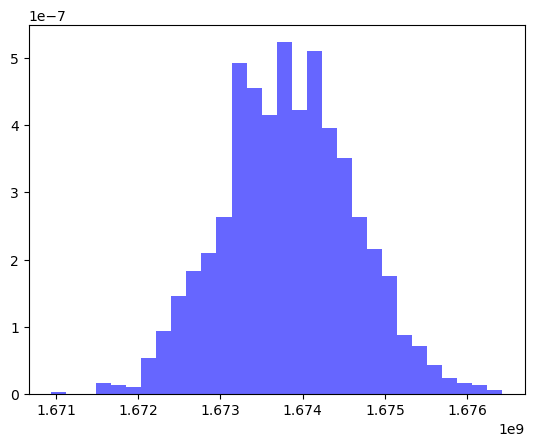

In [237]:
# Plot the histogram of the generated samples
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')
plt.show()

In [238]:
control_group.describe()

,customer_id,numeric_timestamp
count,1622.000000,1.622000e+03
mean,2511.205919,1.673810e+09
std,1468.595810,7.739107e+05
min,2.000000,1.672531e+09
25%,1240.500000,1.673136e+09
50%,2518.000000,1.673827e+09
75%,3838.500000,1.674518e+09
max,5000.000000,1.675123e+09


### The bell Shaped curve depicts data is normally distributed with mean at 1.673810e+09 and STANDARD DEVIATION AS 7.739107e+05

### Doing the same for calls and emails timestamps'

In [239]:
df_calls.head()

,customer_id,call_timestamp,call_answered
0,1,2023-01-22,True
1,4,2023-02-09,True
2,9,2023-02-20,False
3,11,2023-02-01,True
4,12,2023-02-05,True


In [240]:
calls_timestamp = pd.to_datetime(df_calls['call_timestamp'])

In [241]:
df_calls['numeric_timestamp_calls'] = (calls_timestamp - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [242]:
df_calls.head()

,customer_id,call_timestamp,call_answered,numeric_timestamp_calls
0,1,2023-01-22,True,1674345600
1,4,2023-02-09,True,1675900800
2,9,2023-02-20,False,1676851200
3,11,2023-02-01,True,1675209600
4,12,2023-02-05,True,1675555200


In [243]:
mean = df_calls['numeric_timestamp_calls'].mean()  # Mean of the distribution
std_dev = df_calls['numeric_timestamp_calls'].std()  # Standard deviation of the distribution
size = len(df_calls)  # Number of samples to generate (same as the number of rows in the DataFrame)

In [244]:
# Generate samples from the normal distribution
data = np.random.normal(mean, std_dev, size)

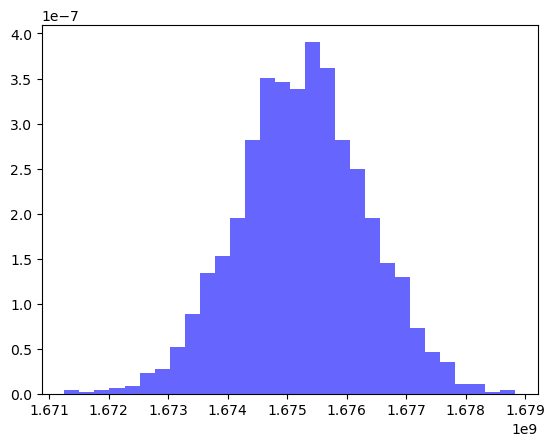

In [245]:
# Plot the histogram of the generated samples
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')
plt.show()

In [246]:
df_calls.describe()

,customer_id,numeric_timestamp_calls
count,1684.000000,1.684000e+03
mean,2480.256532,1.675224e+09
std,1432.234382,1.080590e+06
min,1.000000,1.672618e+09
25%,1260.500000,1.674432e+09
50%,2502.000000,1.675210e+09
75%,3700.500000,1.675987e+09
max,4999.000000,1.677715e+09


# The calls timestamps are also normally distributed with mean 1.675224e+09 and Standard Distribution 1.080590e+06

## Now for emails :

In [247]:
emails_timestamp = pd.to_datetime(df_emails['email_timestamp'])

In [248]:
df_emails['numeric_timestamp_email'] = (emails_timestamp - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [249]:
df_emails.head()

,customer_id,email_timestamp,email_type,numeric_timestamp_email
0,5,2023-01-09,reactivation,1673222400
1,5,2023-01-19,reactivation,1674086400
2,5,2023-01-27,update,1674777600
3,5,2023-01-18,promo,1674000000
4,16,2023-01-22,reactivation,1674345600


In [250]:
mean = df_emails['numeric_timestamp_email'].mean()  # Mean of the distribution
std_dev = df_emails['numeric_timestamp_email'].std()  # Standard deviation of the distribution
size = len(df_emails)  # Number of samples to generate (same as the number of rows in the DataFrame)

In [251]:
# Generate samples from the normal distribution
data = np.random.normal(mean, std_dev, size)

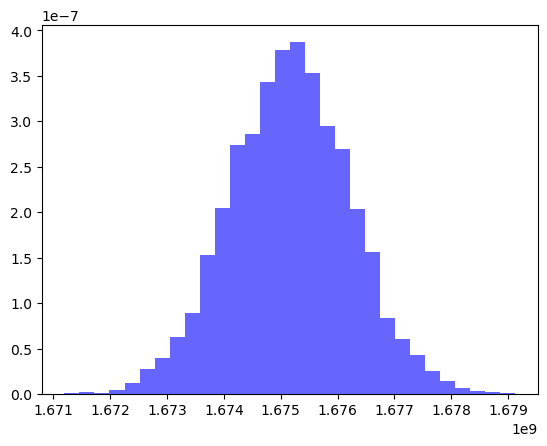

In [252]:
# Plot the histogram of the generated samples
plt.hist(data, bins=30, density=True, histtype = 'bar', alpha=0.6, color='b')
plt.show()

In [253]:
df_emails.describe()

,customer_id,numeric_timestamp_email
count,4193.000000,4.193000e+03
mean,2485.513713,1.675142e+09
std,1424.545334,1.066221e+06
min,5.000000,1.672618e+09
25%,1237.000000,1.674432e+09
50%,2469.000000,1.675123e+09
75%,3679.000000,1.675901e+09
max,4996.000000,1.677715e+09


# The email timestamps are also normally distributed with mean 1.675142e+09 and STD 1.066221e+06

### Hence, they are comparable and Hypothesis test can be performed, we can use t-test since the data is normally distributed.

In [254]:
# Generate some sample data (replace this with your actual data)
control_g = control_group['numeric_timestamp']
treatment_g = df_calls['numeric_timestamp_calls']

In [255]:
# Perform t-test
t_statistic, p_value = stats.ttest_ind(control_g, treatment_g)

# Set significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("We fail to reject the null Hypothesis for calls treatment group")
else:
    print("We reject the null Hypothesis for calls treatment group")

We fail to reject the null Hypothesis for calls treatment group


In [256]:
print(p_value)

6e-323


# Now lets do the same t-test for emails treatment group

In [257]:
# Generate some sample data (replace this with your actual data)
control_g = control_group['numeric_timestamp']
treatment_g_email = df_emails['numeric_timestamp_email']

In [258]:
# Perform t-test
t_statistic, p_value = stats.ttest_ind(control_g, treatment_g_email)

# Set significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("We fail to reject the null Hypothesis for emails treatment group")
else:
    print("We reject the null Hypothesis for emails treatment group")

We fail to reject the null Hypothesis for emails treatment group


In [259]:
print(p_value)

0.0


# This means we can compare the control and treatment group and the inferences which we made in Question 1 holds true with an error of 5% (Since alpha is 0.05)

# For last Question 5

In [260]:
filtered_df = df_emails[df_emails['email_type'] != 'reactivation']

# Get unique customer_id values from the filtered DataFrame
customer_ids_not_reactivated = filtered_df['customer_id'].unique()

In [261]:
len(customer_ids_not_reactivated)

1115